Weather and Clothing Predictor:
Machine Learning Project

Contributers: Jack Gardner, Linh Stitsel, Nhan Nguyen, James Smith

Recorded Video: https://drive.google.com/file/d/15794jTA7y2F3RQ_7LlB9yi8pwqVIkmKn/view?usp=sharing

Presentation Slides: https://docs.google.com/presentation/d/1gMeBNTDikzWG_lzoMkeWoPGNKKcnl90tE7AVdNLAp_0/edit?usp=sharing

Project Report: https://docs.google.com/document/d/1iG9EPbiNin7wr15noPvJyV20KziQBTSgfH61ZD6HaBw/edit?usp=sharing

Project Documentation: https://docs.google.com/document/d/1SJor6FJegVT3DL-xVqsXkC5J4jBqMF-_0ICNvaJtIBI/edit?usp=sharing


Instructions:

Imports and Installations : Run this before running any other code. Modules may take a long time to *install*

In [ ]:
!pip install meteostat

Training Function

In [ ]:
# Imports
import pandas as pd
from datetime import datetime
from meteostat import Point, Daily
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Set time period
start = datetime(1950, 1, 1)
end = datetime(2022, 12, 31)

start_year = start.year

# Create Point for New York, NY
tpr = Point(40.78325, -73.96565)

# Get daily data for 2020-2022
data = Daily(tpr, start, end)
data = data.fetch()

data = data.fillna(data.mean())

# Extract day, month, and year as features
data['day'] = data.index.day
data['month'] = data.index.month
data['year'] = data.index.year - start_year
data['days_since_start'] = (data.index - start).days + 1

# Target variables for each model
target_variables = ['tavg', 'prcp', 'snow', 'wspd']

# Initialize and train models for each target variable
models = {}
for variable in target_variables:
    X = data[['day', 'month', 'year', 'days_since_start']]
    y = data[variable]

    # Initialize and train the model
    weather_model = RandomForestRegressor(n_estimators=150, random_state=42)
    weather_model.fit(X, y)

    # Save the model
    models[variable] = weather_model



print("Model Trained")


Model Trained


**Random Forest Refressor Graph Function**

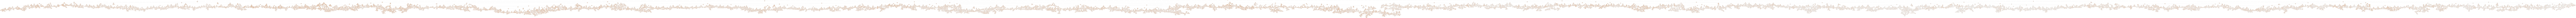

In [ ]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(weather_model.estimators_[5], out_file='tree.dot',
                feature_names = ['day', 'month', 'year', 'days_since_start'],
                class_names = target_variables,
                rounded = True, proportion = False,
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

**Clothing Prediction Functions**

In [ ]:
def print_predicted_weather_stats(predicted_temp, predicted_precipitation, predicted_snow, predicted_wind):
    # Display predicted temperature
    print("\nPredicted Temperature:", end=" ")
    print(f"{predicted_temp} °C", end=" ")

    # Categorize temperature based on ranges
    if predicted_temp <= 0:
        print("(Freezing)")
    elif 0 < predicted_temp <= 5:
        print("(Cold)")
    elif 5 < predicted_temp <= 15:
        print("(Cool)")
    elif 15 < predicted_temp <= 22:
        print("(Mild/Cool)")
    elif 22 < predicted_temp <= 30:
        print("(Warm)")
    elif 30 < predicted_temp <= 60:
        print("(Hot)")
    else:
        print("(LMAO IM DEAD)")

    # Display predicted precipitation
    print("Predicted Precipitation:", end=" ")

    # Check if predicted precipitation is snow
    if predicted_snow > 0:
        # Convert predicted snow depth to inches and round to one decimal place
        inches_snow = round(predicted_snow / 25.4, 1)

        # Categorize snowfall based on depth
        print(f"{inches_snow} inch", end=" ")
        if predicted_snow <= 75:
            print("(Light Snowfall)")
        elif 75 < predicted_snow <= 200:
            print("(Moderate Snowfall)")
        elif 200 < predicted_snow <= 300:
            print("(Significant Snowfall)")
        elif 300 < predicted_snow <= 600:
            print("(Heavy Snowfall)")
        elif 600 < predicted_snow <= 900:
            print("(Extremely Heavy Snowfall)")
        else:
            print("(Boss man still wants you to go to work today.)")

    # If not snow, categorize other types of precipitation
    else:
        # Categorize rainfall based on depth
        print(f"{predicted_precipitation} mm", end=" ")
        if predicted_precipitation == 0:
            print("(No Precipitation)")
        elif 0 < predicted_precipitation < 2.5:
            print("(Very Light Rain)")
        elif 2.5 <= predicted_precipitation < 7.6:
            print("(Light Rain)")
        elif 7.6 <= predicted_precipitation < 15:
            print("(Moderate Rain)")
        elif 15 <= predicted_precipitation < 30:
            print("(Heavy Rain)")
        elif 30 <= predicted_precipitation < 50:
            print("(Very Heavy Rain)")
        elif 50 <= predicted_precipitation < 70:
            print("(Extremely Heavy Rain)")
        else:
            print("(Hello, how are you. I am under the water. Please help me. Here too much raining. Blubluubluu)")

    # Display predicted wind speed
    print(f"Predicted Wind Speed: {predicted_wind} km/h", end=" ")

    # Categorize wind speed based on ranges
    if predicted_wind < 12:
        print("(Calm)\n")
    elif 12 <= predicted_wind < 20:
        print("(Light Breeze)\n")
    elif 20 <= predicted_wind < 30:
        print("(Moderate Breeze)\n")
    elif 30 <= predicted_wind < 40:
        print("(Fresh Breeze)\n")
    elif 40 <= predicted_wind < 50:
        print("(Strong Breeze)\n")
    elif 50 <= predicted_wind < 60:
        print("(Moderate Gale)\n")
    elif 60 <= predicted_wind < 75:
        print("(Fresh Gale)\n")
    elif 75 <= predicted_wind < 90:
        print("(Strong Gale to Hurricane Force)\n")
    else:
        print("(Sorry, I sneezed)\n")


def print_clothing_suggestions(predicted_temp, predicted_precipitation):
    """
    Provides clothing suggestions based on predicted temperature and precipitation.

    Parameters:
    - predicted_temp (float): The predicted temperature in Celsius (C).
    - predicted_precipitation (float): The predicted precipitation in millimeters (mm).
    """

    # Print Clothing Suggestions based on Predicted Temperature
    if predicted_temp < 0:
        print("Clothing Suggestions for Freezing Weather Conditions:\n"
              " - Heavy Winter Coat\n"
              " - Sweater or Fleece Layer\n"
              " - Warm Pants\n"
              " - Insulated Boots\n"
              " - Warm Hat, Gloves, and a Scarf")
    elif 0 <= predicted_temp < 5:
        print("Clothing Suggestions for Cold Weather Conditions:\n"
              " - Winter Coat or Insulated Jacket\n"
              " - Sweater or Fleece Layer\n"
              " - Warm Pants\n"
              " - Warm Hat, Gloves, and a Scarf")
    elif 5 <= predicted_temp < 15:
        print("Clothing Suggestions for Cool Weather Conditions:\n"
              " - Light to Medium-Weight Jacket or Sweater\n"
              " - Long-Sleeve Top\n"
              " - Regular Pants\n"
              " - Closed-toe Shoes or Boots")
    elif 15 <= predicted_temp < 22:
        print("Clothing Suggestions for Mild/Cool Weather Conditions:\n"
              " - Regular T-shirt or Blouse\n"
              " - Light Jacket\n"
              " - Shorts or Light Pants\n"
              " - Sneakers or Sandals")
    elif 22 <= predicted_temp < 30:
        print("Clothing Suggestions for Warm Weather Conditions:\n"
              " - Short-Sleeve Shirts or Dresses\n"
              " - Shorts or Light Pants\n"
              " - Sneakers or Breathable Shoes\n"
              " - Hat for Sun Protection\n"
              " - Sunglasses")
    else:
        print("Clothing Suggestions for Hot Weather Conditions:\n"
              " - Lightweight and breathable clothing\n"
              " - Sandals or Open-Toe Shoes\n"
              " - Hat for Sun Protection\n"
              " - Sunglasses")

    # Print Additional Clothing Suggestion based on Predicted Precipitation
    if predicted_precipitation > 5:
        print(" - Raincoat\n")

In [ ]:
# Make predictions for a specific date ('2028-01-01')

dates = [
    (2024, 1, 4),
    (2024, 2, 3),
    (2024, 3, 12),
    (2024, 4, 23),
    (2024, 5, 11),
    (2024, 6, 2),
    (2024, 7, 5),
    (2024, 8, 9),
    (2024, 9, 16),
    (2024, 10, 19),
    (2024, 11, 21),
    (2024, 12, 20)
]

for date in dates:
  date_to_test = datetime(date[0], date[1], date[2])

  new_data = pd.DataFrame({
      'day': [date_to_test.day],
      'month': [date_to_test.month],
      'year': [date_to_test.year - start_year],
      'days_since_start': [(date_to_test - start).days + 1]
  })

  # Make predictions for each target variable
  predictions = {}
  for variable, model in models.items():
      predictions[variable] = model.predict(new_data)

  stats = []
  # Print predictions for each variable
  for variable, prediction in predictions.items():
      #print(f'{variable}: {prediction}')
      stats.append(int(prediction))
  print_predicted_weather_stats(stats[0], stats[1], stats[2], stats[3])
  print_clothing_suggestions(stats[0], stats[1])


Predicted Temperature: 0 °C (Freezing)
Predicted Precipitation: 0.6 inch (Light Snowfall)
Predicted Wind Speed: 11 km/h (Calm)

Clothing Suggestions for Cold Weather Conditions:
 - Winter Coat or Insulated Jacket
 - Sweater or Fleece Layer
 - Warm Pants
 - Warm Hat, Gloves, and a Scarf
 - Raincoat


Predicted Temperature: 4 °C (Cold)
Predicted Precipitation: 1.3 inch (Light Snowfall)
Predicted Wind Speed: 11 km/h (Calm)

Clothing Suggestions for Cold Weather Conditions:
 - Winter Coat or Insulated Jacket
 - Sweater or Fleece Layer
 - Warm Pants
 - Warm Hat, Gloves, and a Scarf
 - Raincoat


Predicted Temperature: 7 °C (Cool)
Predicted Precipitation: 9 mm (Moderate Rain)
Predicted Wind Speed: 12 km/h (Light Breeze)

Clothing Suggestions for Cool Weather Conditions:
 - Light to Medium-Weight Jacket or Sweater
 - Long-Sleeve Top
 - Regular Pants
 - Closed-toe Shoes or Boots
 - Raincoat


Predicted Temperature: 12 °C (Cool)
Predicted Precipitation: 5 mm (Light Rain)
Predicted Wind Speed: 